<a href="https://colab.research.google.com/github/meriemdouider1/pfe/blob/main/cx_theileri16%20aout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score, r2_score

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import numpy 
import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, metrics, model_selection, svm
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, metrics, model_selection, svm
from sklearn.metrics import matthews_corrcoef
from sklearn.svm import SVC

In [ ]:
Cl = '/content/cx-theilequi.xlsx'
data= pd.read_excel(Cl,
sheet_name=0,
header=0,
index_col=False,
keep_default_na=True)

In [ ]:
del data["Source"]
del data["CodeSite"]

In [ ]:
data

,X_long,Y_lat,Cx_theileri,Bovins,Volaille,Caprins,Ovins,Equides,Coniferes,ZoneAride,ZonePel,Lesfeuillus,Caduc,Autres,Arbrisseau,Pl_herb,VegCul,VegInond,ZoneUrbaine,Moy_IRM,Amp1_IRM,Amp2_IRM,Amp3_IRM,VarT_ann_IRM,VarT_bi_IRM,VarT_tri_IRM,VarT_Cy_IRM,Min_IRM,Max_IRM,Ph1_IRM,Ph2_IRM,Ph3_IRM,Var_IRM,Moy_TempJ,Amp1_TempJ,Amp2_TempJ,Amp3_TempJ,VarT_ann_TempJ,VarT_bi_TempJ,VarT_tri_TempJ,...,Tmax_Sept,Tmax_Oct,Tmax_Nov,Tmax_Dec,Tmin_Janv,Tmin_Fev,Tmin_Mars,Tmin_Avril,Tmin_Mai,Tmin_Juin,Tmin_Juill,Tmin_Aout,Tmin_Sept,Tmin_Oct,Tmin_Nov,Tmin_Dec,Vap_Janv,Vap_Fev,Vap_Mars,Vap_Avril,Vap_Mai,Vap_Juin,Vap_Juill,Vap_Aout,Vap_Sept,Vap_Oct,Vap_Nov,Vap_Dec,Vent_Janv,Vent_Fev,Vent_Mars,Vent_Avril,Vent_Mai,Vent_Juin,Vent_Juill,Vent_Aout,Vent_Sept,Vent_Oct,Vent_Nov,Vent_Dec
0,-15.911420,23.794740,0,0.000000,0.000000,0.000000,0.000000,0.624435,0,97,3,0,0,0,0,0,0,0,0,3340,570,110,50,47,2,0,49,2690,3950,566,160,231,0,14905,96,83,7,30,23,0,...,26.500000,26.000000,24.500000,22.500000,14.5,14.8,15.7,15.6,16.200001,17.299999,18.000000,18.900000,19.200001,18.799999,17.299999,15.2,1.31,1.44,1.55,1.63,1.72,1.91,2.07,2.18,2.16,2.02,1.71,1.47,4.8,5.6,6.1,6.9,7.2,7.1,7.5,7.2,6.3,5.4,5.5,4.9
1,-13.188370,27.132950,0,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,1,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
2,-13.188370,27.132950,0,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,1,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
3,-13.185620,27.157940,1,0.000000,0.000000,0.000000,0.000000,0.269410,0,100,0,0,0,0,0,0,0,0,0,3580,590,40,50,48,0,0,48,2930,4140,600,214,106,0,15264,306,120,23,74,11,0,...,29.200001,27.600000,25.100000,22.700001,12.3,13.1,14.4,15.0,16.000000,17.600000,19.000000,20.200001,19.600000,18.100000,15.500000,13.1,1.19,1.33,1.43,1.52,1.64,1.86,2.04,2.12,2.10,1.97,1.61,1.40,4.2,4.5,5.1,5.6,5.5,6.2,6.2,6.2,5.7,4.1,3.7,3.9
4,-13.167180,27.157730,0,0.000000,0.000000,0.000000,0.000000,0.379107,0,100,0,0,0,0,0,0,0,0,0,3000,590,70,10,18,0,0,18,2350,3540,577,185,64,10,15310,295,115,33,66,10,1,...,29.400000,27.799999,25.299999,22.900000,12.4,13.2,14.6,15.2,16.100000,17.700001,19.100000,20.200001,19.700001,18.200001,15.600000,13.2,1.20,1.34,1.44,1.53,1.65,1.88,2.07,2.14,2.13,1.99,1.63,1.41,4.2,4.2,5.0,5.2,5.4,5.7,6.2,5.8,5.6,4.2,3.6,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,-5.283333,35.633333,1,0.000000,0.000000,0.000000,0.000000,0.576012,0,0,3,0,0,0,0,0,0,0,97,1310,460,10,30,74,0,0,74,890,1730,637,551,11,0,0,0,0,0,0,0,0,...,26.000000,22.900000,19.500000,17.100000,9.2,9.8,11.3,12.8,15.100000,18.299999,21.000000,21.600000,19.700001,16.600000,13.300000,10.8,1.12,1.18,1.24,1.32,1.54,1.82,2.06,2.17,2.02,1.71,1.39,1.23,3.7,4.1,4.6,4.2,4.1,4.1,4.0,3.8,3.9,3.9,3.4,3.8
224,-5.325286,35.685852,1,7.352805,115.615433,7.495493,18.920124,0.577831,0,21,1,25,0,0,0,0,25,0,28,1940,730,50,20,87,0,0,87,1290,2690,625,45,50,0,14891,543,68,7,92,1,0,...,25.700001,22.400000,19.100000,16.400000,9.7,10.5,12.0,13.5,15.800000,18.600000,21.500000,22.000000,20.200001,16.900000,13.600000,10.9,1.12,1.17,1.24,1.32,1.53,1.81,2.05,2.16,2.01,1.71,1.39,1.22,4.0,4.6,4.5,4.2,4.2,4.1,4.0,4.1,4.0,4.0,3.9,4.3
225,-5.833954,35.759465,1

In [ ]:
(data[data["Cx_theileri"]==1]).count

<bound method DataFrame.count of         X_long      Y_lat  Cx_theileri  ...  Vent_Oct  Vent_Nov  Vent_Dec
3   -13.185620  27.157940            1  ...       4.1       3.7       3.9
7   -13.207000  27.166000            1  ...       4.6       3.8       3.9
11  -13.214230  27.166700            1  ...       4.4       3.6       3.8
15  -10.227900  28.971600            1  ...       3.6       3.3       3.7
19   -9.504191  30.350700            1  ...       2.9       3.5       3.1
..         ...        ...          ...  ...       ...       ...       ...
223  -5.283333  35.633333            1  ...       3.9       3.4       3.8
224  -5.325286  35.685852            1  ...       4.0       3.9       4.3
225  -5.833954  35.759465            1  ...       3.5       3.8       3.9
226  -5.366667  35.766667            1  ...       4.0       4.0       4.2
227  -5.816667  35.783333            1  ...       3.6       3.8       4.0

[114 rows x 226 columns]>

In [ ]:
(data[data["Cx_theileri"]==0]).count

<bound method DataFrame.count of        X_long     Y_lat  Cx_theileri  ...  Vent_Oct  Vent_Nov  Vent_Dec
0   -15.91142  23.79474            0  ...       5.4       5.5       4.9
1   -13.18837  27.13295            0  ...       4.3       3.7       3.8
2   -13.18837  27.13295            0  ...       4.3       3.7       3.8
4   -13.16718  27.15773            0  ...       4.2       3.6       3.8
5   -13.20156  27.16507            0  ...       4.6       3.8       3.9
..        ...       ...          ...  ...       ...       ...       ...
140  -6.00400  30.45600            0  ...       2.7       3.0       2.8
141  -6.23900  30.69500            0  ...       2.7       3.0       3.2
142  -6.91000  30.91300            0  ...       2.7       2.9       2.8
143  -6.86400  30.86600            0  ...       3.4       3.4       3.6
145  -5.00000  31.52220            0  ...       3.4       2.8       3.0

[114 rows x 226 columns]>

In [ ]:
X1 = data.loc[:, data.columns != 'Cx_theileri']
y1 = data.Cx_theileri

In [ ]:
X1

,X_long,Y_lat,Bovins,Volaille,Caprins,Ovins,Equides,Coniferes,ZoneAride,ZonePel,Lesfeuillus,Caduc,Autres,Arbrisseau,Pl_herb,VegCul,VegInond,ZoneUrbaine,Moy_IRM,Amp1_IRM,Amp2_IRM,Amp3_IRM,VarT_ann_IRM,VarT_bi_IRM,VarT_tri_IRM,VarT_Cy_IRM,Min_IRM,Max_IRM,Ph1_IRM,Ph2_IRM,Ph3_IRM,Var_IRM,Moy_TempJ,Amp1_TempJ,Amp2_TempJ,Amp3_TempJ,VarT_ann_TempJ,VarT_bi_TempJ,VarT_tri_TempJ,VarT_cy_TempJ,...,Tmax_Sept,Tmax_Oct,Tmax_Nov,Tmax_Dec,Tmin_Janv,Tmin_Fev,Tmin_Mars,Tmin_Avril,Tmin_Mai,Tmin_Juin,Tmin_Juill,Tmin_Aout,Tmin_Sept,Tmin_Oct,Tmin_Nov,Tmin_Dec,Vap_Janv,Vap_Fev,Vap_Mars,Vap_Avril,Vap_Mai,Vap_Juin,Vap_Juill,Vap_Aout,Vap_Sept,Vap_Oct,Vap_Nov,Vap_Dec,Vent_Janv,Vent_Fev,Vent_Mars,Vent_Avril,Vent_Mai,Vent_Juin,Vent_Juill,Vent_Aout,Vent_Sept,Vent_Oct,Vent_Nov,Vent_Dec
0,-15.911420,23.794740,0.000000,0.000000,0.000000,0.000000,0.624435,0,97,3,0,0,0,0,0,0,0,0,3340,570,110,50,47,2,0,49,2690,3950,566,160,231,0,14905,96,83,7,30,23,0,53,...,26.500000,26.000000,24.500000,22.500000,14.5,14.8,15.7,15.6,16.200001,17.299999,18.000000,18.900000,19.200001,18.799999,17.299999,15.2,1.31,1.44,1.55,1.63,1.72,1.91,2.07,2.18,2.16,2.02,1.71,1.47,4.8,5.6,6.1,6.9,7.2,7.1,7.5,7.2,6.3,5.4,5.5,4.9
1,-13.188370,27.132950,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,1,87,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
2,-13.188370,27.132950,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,1,87,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
3,-13.185620,27.157940,0.000000,0.000000,0.000000,0.000000,0.269410,0,100,0,0,0,0,0,0,0,0,0,3580,590,40,50,48,0,0,48,2930,4140,600,214,106,0,15264,306,120,23,74,11,0,85,...,29.200001,27.600000,25.100000,22.700001,12.3,13.1,14.4,15.0,16.000000,17.600000,19.000000,20.200001,19.600000,18.100000,15.500000,13.1,1.19,1.33,1.43,1.52,1.64,1.86,2.04,2.12,2.10,1.97,1.61,1.40,4.2,4.5,5.1,5.6,5.5,6.2,6.2,6.2,5.7,4.1,3.7,3.9
4,-13.167180,27.157730,0.000000,0.000000,0.000000,0.000000,0.379107,0,100,0,0,0,0,0,0,0,0,0,3000,590,70,10,18,0,0,18,2350,3540,577,185,64,10,15310,295,115,33,66,10,1,77,...,29.400000,27.799999,25.299999,22.900000,12.4,13.2,14.6,15.2,16.100000,17.700001,19.100000,20.200001,19.700001,18.200001,15.600000,13.2,1.20,1.34,1.44,1.53,1.65,1.88,2.07,2.14,2.13,1.99,1.63,1.41,4.2,4.2,5.0,5.2,5.4,5.7,6.2,5.8,5.6,4.2,3.6,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,-5.283333,35.633333,0.000000,0.000000,0.000000,0.000000,0.576012,0,0,3,0,0,0,0,0,0,0,97,1310,460,10,30,74,0,0,74,890,1730,637,551,11,0,0,0,0,0,0,0,0,0,...,26.000000,22.900000,19.500000,17.100000,9.2,9.8,11.3,12.8,15.100000,18.299999,21.000000,21.600000,19.700001,16.600000,13.300000,10.8,1.12,1.18,1.24,1.32,1.54,1.82,2.06,2.17,2.02,1.71,1.39,1.23,3.7,4.1,4.6,4.2,4.1,4.1,4.0,3.8,3.9,3.9,3.4,3.8
224,-5.325286,35.685852,7.352805,115.615433,7.495493,18.920124,0.577831,0,21,1,25,0,0,0,0,25,0,28,1940,730,50,20,87,0,0,87,1290,2690,625,45,50,0,14891,543,68,7,92,1,0,93,...,25.700001,22.400000,19.100000,16.400000,9.7,10.5,12.0,13.5,15.800000,18.600000,21.500000,22.000000,20.200001,16.900000,13.600000,10.9,1.12,1.17,1.24,1.32,1.53,1.81,2.05,2.16,2.01,1.71,1.39,1.22,4.0,4.6,4.5,4.2,4.2,4.1,4.0,4.1,4.0,4.0,3.9,4.3
225,-5.833954,35.

In [37]:
y1

0      0
1      0
2      0
3      1
4      0
      ..
223    1
224    1
225    1
226    1
227    1
Name: Cx_theileri, Length: 228, dtype: int64

In [94]:
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import balanced_accuracy_score

XGBClassifier


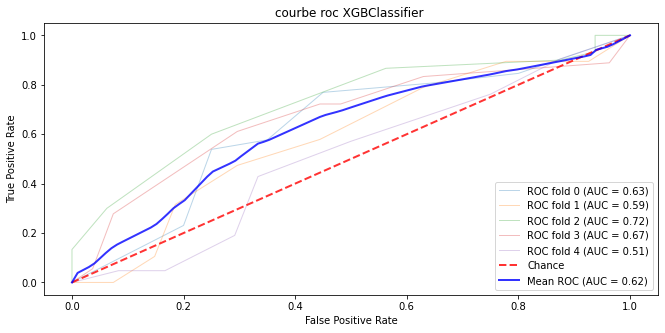

Accuracy: [0.60869565 0.56521739 0.65217391 0.62222222 0.55555556]
moy_accuracy: 0.60
precision: [0.68181818 0.47826087 0.81818182 0.52       0.52941176]
moy_precision: 0.61
sensibilité : [0.57692308 0.57894737 0.6        0.72222222 0.42857143]
moy_sensibilité: 0.58
spécificité : [0.65       0.55555556 0.75       0.55555556 0.66666667]
moy_spécificité: 0.64
MCC : [0.2251974  0.13245324 0.33371191 0.27386128 0.09799919]
MCC: 0.21


In [92]:
classifiers = {
    "XGBClassifier":  KNeighborsClassifier(n_neighbors=13)
}
def tp(y_true, y_pred): 
    error= confusion_matrix(y_true, y_pred)[0,0]/(confusion_matrix(y_true,y_pred)[0,0] + confusion_matrix(y_true, y_pred)[0,1])
    return error

my_scorer = make_scorer(tp, greater_is_better=True)
my_scorer = make_scorer(tp, greater_is_better=True)
def tp1(y_true, y_pred): 
    MCC= matthews_corrcoef(y_true, y_pred)
    return MCC

my_scorer1 = make_scorer(tp1, greater_is_better=True)
cv = KFold(n_splits=5, random_state=1, shuffle=True)
for name, clf in classifiers.items():
    print(name)
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots(figsize=(11, 5))
    for i, (train, test) in enumerate(cv.split(X1, y1)):
         clf.fit(X1.loc[train,], y1.loc[train,])
         viz = plot_roc_curve(clf, X1.loc[test,], y1.loc[test,],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
         interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
         interp_tpr[0] = 0.0
         tprs.append(interp_tpr)
         aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f)' % (mean_auc),
        lw=2, alpha=.8)

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="courbe roc %s " %name)
    ax.legend(loc="lower right")
    plt.show()
    # evaluate model
    scores = cross_val_score(clf, X1, y1, scoring='accuracy', cv=cv, n_jobs=-1)
    scores1 = cross_val_score(clf, X1, y1, scoring='precision', cv=cv, n_jobs=-1)
    scores2 = cross_val_score(clf, X1, y1, scoring='recall', cv=cv, n_jobs=-1)
    scores3 = cross_val_score(clf, X1, y1, scoring=my_scorer, cv=cv, n_jobs=-1)
    scores4 = cross_val_score(clf, X1, y1, scoring=my_scorer1, cv=cv, n_jobs=-1)
    # report performance
    print('Accuracy:',scores)
    print('moy_accuracy: %.2f' % mean(scores))
    print('precision:',scores1)
    print('moy_precision: %.2f' % mean(scores1))
    print('sensibilité :',scores2)
    print('moy_sensibilité: %.2f' % mean(scores2))
    print('spécificité :',scores3)
    print('moy_spécificité: %.2f' % mean(scores3))
    print('MCC :',scores4)
    print('MCC: %.2f' % mean(scores4))

XGBClassifier


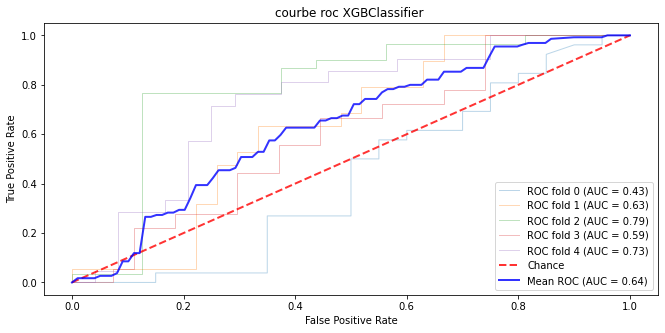

Accuracy: [0.5        0.63043478 0.69565217 0.55555556 0.66666667]
moy_accuracy: 0.61
precision: [0.56521739 0.54545455 0.9        0.46153846 0.6875    ]
moy_precision: 0.63
sensibilité : [0.5        0.63157895 0.6        0.66666667 0.52380952]
moy_sensibilité: 0.58
spécificité : [0.5        0.62962963 0.875      0.48148148 0.79166667]
moy_spécificité: 0.66
MCC : [0.         0.25747149 0.45636524 0.14694367 0.32879323]
MCC: 0.24
balanced_accuracy : [0.5        0.63060429 0.7375     0.57407407 0.6577381 ]
balanced_accuracy: 0.62
roc_auc : [0.42596154 0.63352827 0.79166667 0.59465021 0.73214286]
roc_auc: 0.64
cohen_kappa_scorec : [0.         0.2552381  0.41454545 0.13793103 0.32024169]
cohen_kappa_scorec: 0.23
LogisticRegression


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


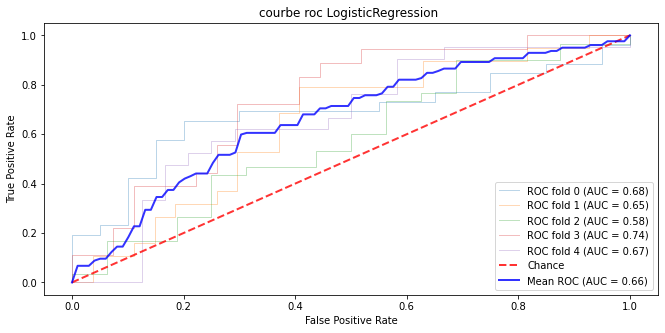

Accuracy: [0.7173913  0.65217391 0.65217391 0.64444444 0.66666667]
moy_accuracy: 0.67
precision: [0.80952381 0.57142857 0.73333333 0.54166667 0.65      ]
moy_precision: 0.66
sensibilité : [0.65384615 0.63157895 0.73333333 0.72222222 0.61904762]
moy_sensibilité: 0.67
spécificité : [0.8        0.66666667 0.5        0.59259259 0.70833333]
moy_spécificité: 0.65
MCC : [0.45167981 0.29481739 0.23333333 0.30914201 0.32868787]
MCC: 0.32
balanced_accuracy : [0.72692308 0.64912281 0.61666667 0.65740741 0.66369048]
balanced_accuracy: 0.66
roc_auc : [0.65576923 0.66081871 0.64166667 0.73868313 0.67063492]
roc_auc: 0.67
cohen_kappa_scorec : [0.4411215  0.29366603 0.23333333 0.29824561 0.32835821]
cohen_kappa_scorec: 0.32
RandomForestClassifier


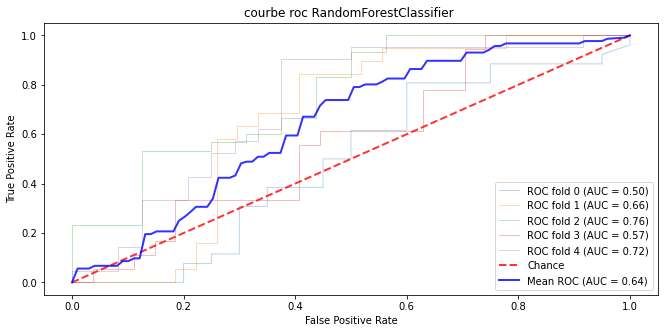

Accuracy: [0.56521739 0.60869565 0.67391304 0.53333333 0.64444444]
moy_accuracy: 0.61
precision: [0.6        0.54545455 0.75862069 0.47826087 0.6       ]
moy_precision: 0.60
sensibilité : [0.61538462 0.63157895 0.73333333 0.66666667 0.47619048]
moy_sensibilité: 0.62
spécificité : [0.5        0.59259259 0.5625     0.48148148 0.75      ]
moy_spécificité: 0.58
MCC : [0.0765559  0.28265107 0.25617377 0.18257419 0.19239443]
MCC: 0.20
balanced_accuracy : [0.55769231 0.64912281 0.64791667 0.58333333 0.61607143]
balanced_accuracy: 0.61
roc_auc : [0.52019231 0.64327485 0.75208333 0.59259259 0.69444444]
roc_auc: 0.64
cohen_kappa_scorec : [0.07648184 0.37231969 0.29158111 0.15929204 0.27710843]
cohen_kappa_scorec: 0.24
GradientBoostingClassifier


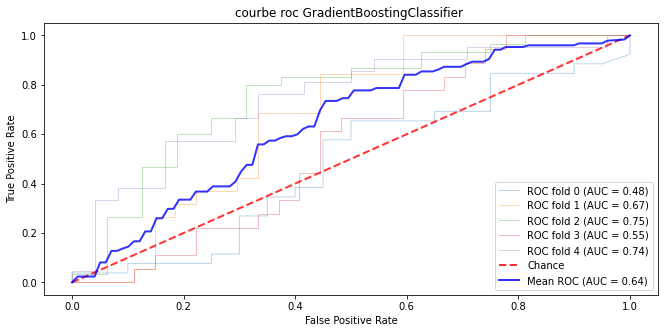

Accuracy: [0.54347826 0.65217391 0.76086957 0.55555556 0.66666667]
moy_accuracy: 0.64
precision: [0.6        0.56521739 0.82758621 0.46153846 0.63636364]
moy_precision: 0.62
sensibilité : [0.57692308 0.68421053 0.8        0.66666667 0.66666667]
moy_sensibilité: 0.68
spécificité : [0.5        0.62962963 0.6875     0.48148148 0.66666667]
moy_spécificité: 0.59
MCC : [0.0765559  0.30905755 0.48102958 0.14694367 0.33267392]
MCC: 0.27
balanced_accuracy : [0.53846154 0.65692008 0.74375    0.57407407 0.66666667]
balanced_accuracy: 0.64
roc_auc : [0.48365385 0.67446394 0.75416667 0.54938272 0.74404762]
roc_auc: 0.64
cohen_kappa_scorec : [0.07648184 0.30434783 0.48049281 0.13793103 0.33234421]
cohen_kappa_scorec: 0.27
GaussianNB


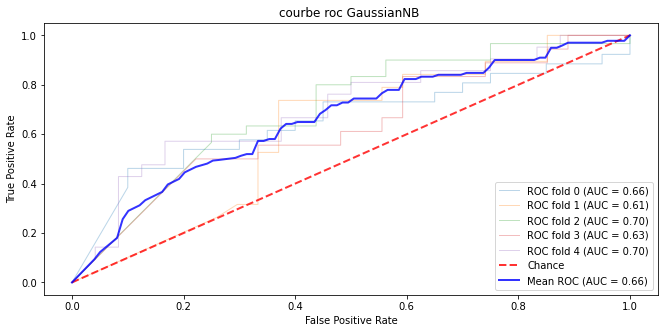

Accuracy: [0.56521739 0.58695652 0.7173913  0.55555556 0.62222222]
moy_accuracy: 0.61
precision: [0.59375    0.5        0.72972973 0.46666667 0.6       ]
moy_precision: 0.58
sensibilité : [0.73076923 0.73684211 0.9        0.77777778 0.57142857]
moy_sensibilité: 0.74
spécificité : [0.35       0.48148148 0.375      0.40740741 0.66666667]
moy_spécificité: 0.46
MCC : [0.0870179  0.22026428 0.33016512 0.19245009 0.23904572]
MCC: 0.21
balanced_accuracy : [0.54038462 0.60916179 0.6375     0.59259259 0.61904762]
balanced_accuracy: 0.60
roc_auc : [0.65576923 0.61403509 0.7        0.63168724 0.70039683]
roc_auc: 0.66
cohen_kappa_scorec : [0.08366534 0.20400729 0.3062645  0.16666667 0.23880597]
cohen_kappa_scorec: 0.20
KNeighborsClassifier


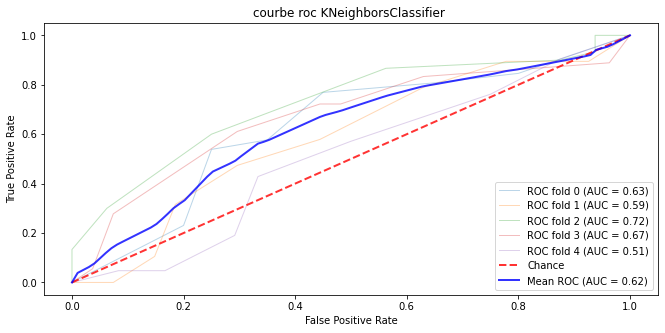

Accuracy: [0.60869565 0.56521739 0.65217391 0.62222222 0.55555556]
moy_accuracy: 0.60
precision: [0.68181818 0.47826087 0.81818182 0.52       0.52941176]
moy_precision: 0.61
sensibilité : [0.57692308 0.57894737 0.6        0.72222222 0.42857143]
moy_sensibilité: 0.58
spécificité : [0.65       0.55555556 0.75       0.55555556 0.66666667]
moy_spécificité: 0.64
MCC : [0.2251974  0.13245324 0.33371191 0.27386128 0.09799919]
MCC: 0.21
balanced_accuracy : [0.61346154 0.56725146 0.675      0.63888889 0.54761905]
balanced_accuracy: 0.61
roc_auc : [0.63173077 0.5877193  0.72291667 0.66872428 0.50694444]
roc_auc: 0.62
cohen_kappa_scorec : [0.22180451 0.13043478 0.31343284 0.26086957 0.09638554]
cohen_kappa_scorec: 0.20


In [96]:
classifiers = {
    "XGBClassifier": XGBClassifier(scale_pos_weight=1,learning_rate=0.1,max_depth=7,n_estimators=1000,subsample=0.9,
 colsample_bytree=0.9),
    "LogisticRegression": LogisticRegression(max_iter=100, solver='lbfgs', class_weight='balanced', random_state=11),
    "RandomForestClassifier": RandomForestClassifier(n_estimators=300, criterion='gini', max_depth=5),
    "GradientBoostingClassifier":GradientBoostingClassifier(n_estimators=300, learning_rate=0.1, max_features=2, max_depth=5, random_state=0,min_samples_leaf=2,subsample=1)
,
    "GaussianNB" : GaussianNB(),
    "KNeighborsClassifier" : KNeighborsClassifier(n_neighbors=13)
}
def tp(y_true, y_pred): 
    error= confusion_matrix(y_true, y_pred)[0,0]/(confusion_matrix(y_true,y_pred)[0,0] + confusion_matrix(y_true, y_pred)[0,1])
    return error

my_scorer = make_scorer(tp, greater_is_better=True)
my_scorer = make_scorer(tp, greater_is_better=True)
def tp1(y_true, y_pred): 
    MCC= matthews_corrcoef(y_true, y_pred)
    return MCC

my_scorer1 = make_scorer(tp1, greater_is_better=True)
def tp2(y_true, y_pred): 
    value = cohen_kappa_score(y_true,y_pred)
    return value
my_scorer2 = make_scorer(tp2, greater_is_better=True)
cv = KFold(n_splits=5, random_state=1, shuffle=True)
for name, clf in classifiers.items():
    print(name)
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots(figsize=(11, 5))
    for i, (train, test) in enumerate(cv.split(X1, y1)):
         clf.fit(X1.loc[train,], y1.loc[train,])
         viz = plot_roc_curve(clf, X1.loc[test,], y1.loc[test,],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
         interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
         interp_tpr[0] = 0.0
         tprs.append(interp_tpr)
         aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f)' % (mean_auc),
        lw=2, alpha=.8)

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="courbe roc %s " %name)
    ax.legend(loc="lower right")
    plt.show()
    # evaluate model
    scores = cross_val_score(clf, X1, y1, scoring='accuracy', cv=cv, n_jobs=-1)
    scores1 = cross_val_score(clf, X1, y1, scoring='precision', cv=cv, n_jobs=-1)
    scores2 = cross_val_score(clf, X1, y1, scoring='recall', cv=cv, n_jobs=-1)
    scores3 = cross_val_score(clf, X1, y1, scoring=my_scorer, cv=cv, n_jobs=-1)
    scores4 = cross_val_score(clf, X1, y1, scoring=my_scorer1, cv=cv, n_jobs=-1)
    scores5 = cross_val_score(clf, X1, y1, scoring="balanced_accuracy", cv=cv, n_jobs=-1)
    scores6 = cross_val_score(clf, X1, y1, scoring="roc_auc", cv=cv, n_jobs=-1)
    scores7 = cross_val_score(clf, X1, y1, scoring=my_scorer2, cv=cv, n_jobs=-1)
    # report performance
    print('Accuracy:',scores)
    print('moy_accuracy: %.2f' % mean(scores))
    print('precision:',scores1)
    print('moy_precision: %.2f' % mean(scores1))
    print('sensibilité :',scores2)
    print('moy_sensibilité: %.2f' % mean(scores2))
    print('spécificité :',scores3)
    print('moy_spécificité: %.2f' % mean(scores3))
    print('MCC :',scores4)
    print('MCC: %.2f' % mean(scores4))
    print('balanced_accuracy :',scores5)
    print('balanced_accuracy: %.2f' % mean(scores5))
    print('roc_auc :',scores6)
    print('roc_auc: %.2f' % mean(scores6))
    print('cohen_kappa_scorec :',scores7)
    print('cohen_kappa_scorec: %.2f' % mean(scores7))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


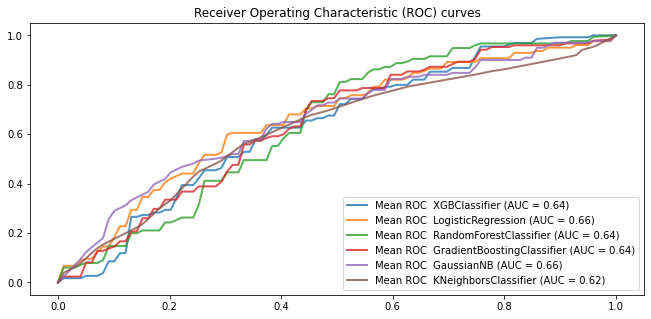

In [97]:
classifiers = {
    "XGBClassifier": XGBClassifier(scale_pos_weight=1,learning_rate=0.1,max_depth=7,n_estimators=1000,subsample=0.9,
 colsample_bytree=0.9),
    "LogisticRegression": LogisticRegression(max_iter=100, solver='lbfgs', class_weight='balanced', random_state=11),
    "RandomForestClassifier": RandomForestClassifier(n_estimators=300, criterion='gini', max_depth=5),
    "GradientBoostingClassifier":GradientBoostingClassifier(n_estimators=300, learning_rate=0.1, max_features=2, max_depth=5, random_state=0,min_samples_leaf=2,subsample=1)
,
    "GaussianNB" : GaussianNB(),
    "KNeighborsClassifier" : KNeighborsClassifier(n_neighbors=13)

}

# prepare plots
fig, ax_roc = plt.subplots(figsize=(11, 5))
cv = KFold(n_splits=5, random_state=1, shuffle=True)
random_state = np.random.RandomState(0)
for name, clf in classifiers.items():
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    for i, (train, test) in enumerate(cv.split(X1, y1)):
        clf.fit(X1.loc[train,], y1.loc[train,])
        viz = plot_roc_curve(clf, X1.loc[test,], y1.loc[test,],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax_roc.plot(mean_fpr, mean_tpr,
    label=r'Mean ROC  %s (AUC = %0.2f)' % (name, mean_auc),
        lw=2, alpha=.8)

ax_roc.set_title('Receiver Operating Characteristic (ROC) curves')

plt.legend()
plt.show()


In [98]:
classifiers = {
    "XGBClassifier": XGBClassifier(scale_pos_weight=1,learning_rate=0.1,max_depth=7,n_estimators=1000,subsample=0.9,
 colsample_bytree=0.9),
    "LogisticRegression": LogisticRegression(max_iter=100, solver='lbfgs', class_weight='balanced', random_state=11),
    "RandomForestClassifier": RandomForestClassifier(n_estimators=300, criterion='gini', max_depth=5),
    "GradientBoostingClassifier":GradientBoostingClassifier(n_estimators=300, learning_rate=0.1, max_features=2, max_depth=5, random_state=0,min_samples_leaf=2,subsample=1)
,
    "GaussianNB" : GaussianNB(),
    "KNeighborsClassifier" : KNeighborsClassifier(n_neighbors=13)

}
for name, clf in classifiers.items():
    print(name)
    # prepare the cross-validation procedure
    loo =LeaveOneOut()
    # evaluate model
    scores1 = cross_val_score(clf, X1, y1, scoring='accuracy', cv=loo, n_jobs=-1)
    # report performance
    print('accuracy: %.2f' % mean(scores1))

XGBClassifier
accuracy: 0.60
LogisticRegression
accuracy: 0.67
RandomForestClassifier
accuracy: 0.64
GradientBoostingClassifier
accuracy: 0.64
GaussianNB
accuracy: 0.63
KNeighborsClassifier
accuracy: 0.62
